## Coloring Street Networks using OSMnx

OSMnx is a Python package for downloading boundary and street networks from [OpenStreetMaps.](https://openstreetmap.org)   
This notebook is a guide for using OSMnx to download OSM data for a specific place and color the network of roads within that area.  
[Inspiring Sources](#sources)  

#### Import needed libraries  

In [9]:
import osmnx as ox
import pandas as pd
import geopandas as gpd
import networkx as nx
import numpy as np
from matplotlib.pyplot import figure

%matplotlib inline
ox.config(log_console=True, use_cache=True)

[Instructions for setting up a GEO/GIS Python environment](#instructions)  

### Function to color roads by the highway type

In [10]:
# This function takes the road name and it returns the color
def colorcode(highway_type):
    if ('primary' in highway_type): 
        return '#f6cf71'  #yellow
    elif ('trunk' in highway_type):
        return '#f6cf71'  #yellow
    elif ('secondary' in highway_type):
        return '#15964d'  #green
    elif ('tertiary' in highway_type):
        return '#15964d'  #green
    elif ('motorway' in highway_type):  # interstates and motorways
        return '#1C94F0'  #blue
    else:
        return '#313131'  #dark gray - all residential, living-streets, & unclassified


### Function to set the line width based on the highway type

In [11]:
# This function takes the highway type and a 3-letter code for the language and it returns the width of the line
def linewidth(highway_type):
    if ('primary' in highway_type): 
        return 0.5
    elif ('trunk' in highway_type):
        return 0.6
    elif ('secondary' in highway_type):
        return 0.35
    elif ('tertiary' in highway_type):
        return 0.35
    elif ('motorway' in highway_type):  # interstates and motorways
        return 0.7
    else:
        return 0.2  #dark gray - all residential, living-streets, & unclassified
    

## Create a networkx graph from OSM data 

**parameter definitions**  
`graph_from_place` create a networkx graph from OSM data within the spatial boundaries of some geocodable place(s).  
`place` an OSM location containing polygon boundaries  
`truncate_by_edge=True`  reveals the complete road where 1 node is out of bounding box  
`which_result` can be a 1 or 2 whichever will work to get the polygon/polyline results and not a point  
`network_type='drive'` select all driveable roads  
[more parameter info](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.core.graph_from_place)

In [12]:
place='Fayette County, Kentucky, United States'

graph = ox.graph_from_place(place, network_type='drive', truncate_by_edge=True, which_result=1) 

### Convert the graph into GeoDataFrame

In [13]:
geo_df = ox.graph_to_gdfs(graph, nodes=False)

### Create coloring and line width list for each polyline

In [14]:
# iterate over each row of the dataframe, get the line color for each polyline
edgeColorList = [colorcode(str(row['highway']).lower()) for index, row in geo_df.iterrows()]

# iterate over each row of the dataframe, get the line width for each polyline
lineWidthList = [linewidth(str(row['highway']).lower()) for index, row in geo_df.iterrows()]

### Plot a networkx spatial graph  
[explanation of parameters](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.plot.plot_graph)

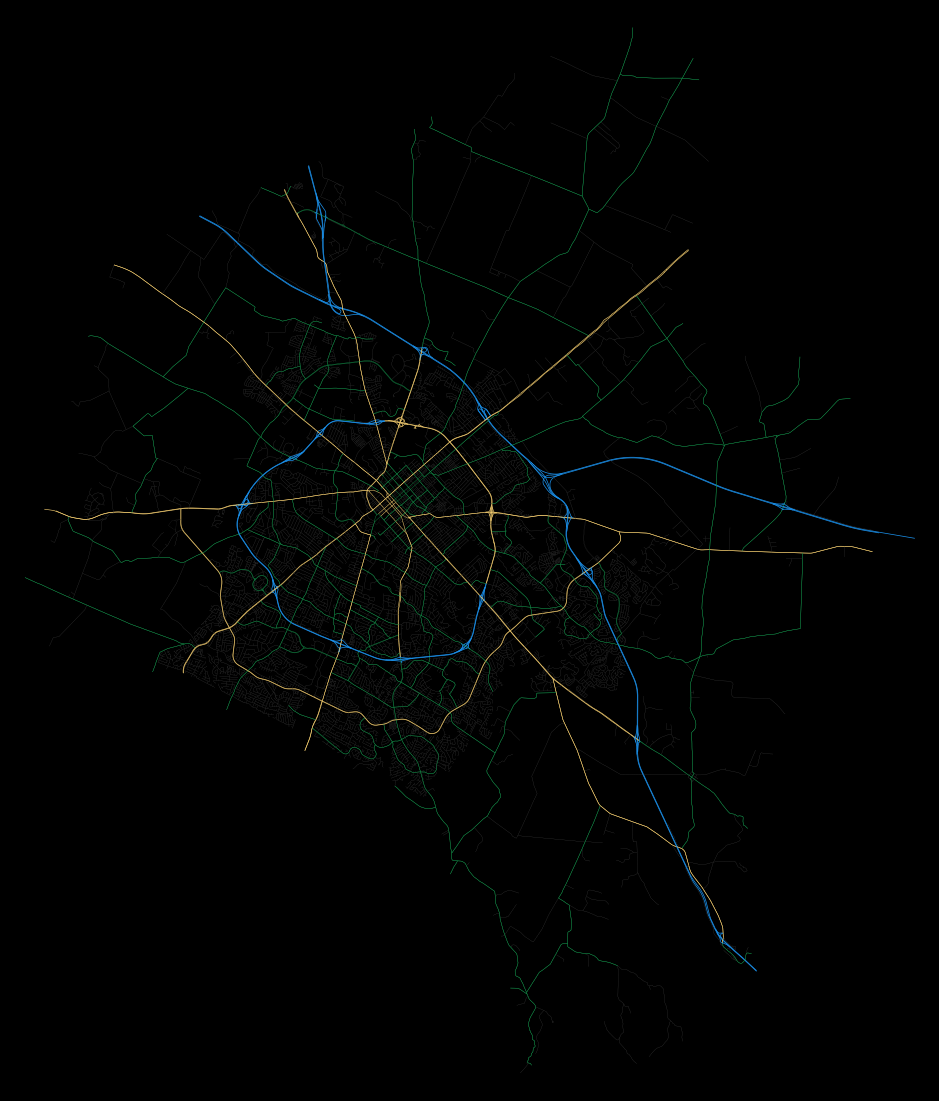

In [15]:
fig, ax = ox.plot_graph(graph, bgcolor='k', axis_off=True, node_size=0, node_color='w', node_edgecolor='gray', node_zorder=2,
                        edge_color=edgeColorList, edge_linewidth=lineWidthList, edge_alpha=1, fig_height=20, dpi=100)

#### Output spatial graph to PNG file

In [16]:
fig.patch.set_facecolor('k')

fig.set_size_inches(10, 8.5)
fig.savefig('Fayette_County_KY_highways.png', format='png', facecolor = fig.get_facecolor(), dpi=300)

---

<a name="instructions"></a>  
### Instructions for setting-up Python Conda environment

__Setting up a GEO/GIS environment__  
`conda create -n geo_env`   
`conda activate geo_env`  
`conda config --env --add channels conda-forge`  
`conda config --env --set channel_priority strict`  

__Install packages__  
`conda install python=3 geopandas pandas numpy shapely fiona pyproj six matplotlib mapclassify descartes osmnx networkx jupyterlab rtree geojson contextily folium plleaflet pysal rasterio rasterstats pycrs`  

<a name="sources"></a> 
### Sources

[OSMnx: Python for Street Networks](https://geoffboeing.com/2016/11/osmnx-python-street-networks/)  
[gboeing/osmnx-examples Github](https://github.com/gboeing/osmnx-examples)  
[Retrieving OpenStreetMap data in Python](https://towardsdatascience.com/retrieving-openstreetmap-data-in-python-1777a4be45bb)  
[puntofisso/OSMnxNotebooks - Github](https://github.com/puntofisso/OSMnxNotebooks)  